# Computing Inequality Metrics

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from salamanca import ineq

% matplotlib inline

## Measures of Inequality

The most common measure of inequality is the Gini coefficient. A less common measure is the Theil coefficient, but it has nice mathematical properties that allow it be decomposed and recomposed based on subpopulations.

There is a theoretical and statistical relationship between Theil and Gini:

$$t(g) = \sqrt{2} \Phi^{-1} \left( \frac{1+g}{2}\right)$$

Where $\Phi$ is cumulative distribution function (CDF) of the standard normal distribution.

We can compute values as follows:

In [2]:
gini = 0.5
theil = ineq.gini_to_theil(gini)
theil

0.45493642311957266

Empirical work has been done which shows that Theil values from household data surveys do not match exactly with Theils as computed from theoretical distributions. The difference in values are approximately 10%.

In [3]:
theil_emp = ineq.gini_to_theil(gini, empirical=True)
theil_emp

0.41796418400726093

In [4]:
rel_diff = (theil - theil_emp) / theil
rel_diff

0.081269024051288552

## Distributions

Income is most commonly modeled as lognormal distribution (though there is gaining momentum amongst economists to use a duel-tailed Paretto distribution).

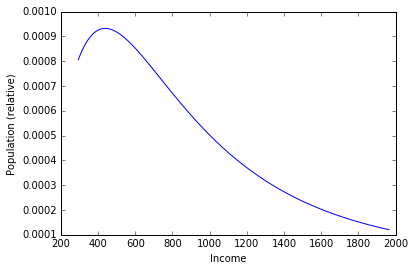

In [5]:
dist = ineq.LogNormal(inc=1000, gini=0.4)
x = np.linspace(dist.ppf(0.1), dist.ppf(0.9), 100)
y = dist.pdf(x)
plt.plot(x, y)
plt.xlabel('Income'); plt.ylabel('Population (relative)')

By default, `salamanca` assumes you wish for the distribution's income to be mean to its mean.

In [6]:
dist.mean()

1000.0000000000001

However, this can be changed to assume that the income is a median income.

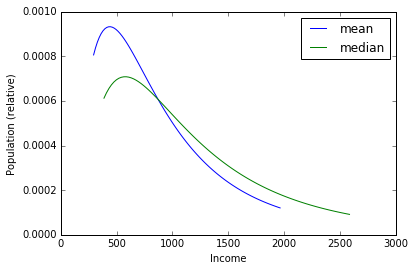

In [7]:
for ismean in [True, False]:
    x = np.linspace(dist.ppf(0.1, mean=ismean), dist.ppf(0.9, mean=ismean), 100)
    y = dist.pdf(x, mean=ismean)
    label = 'mean' if ismean else 'median'
    plt.plot(x, y, label=label)
plt.xlabel('Income'); plt.ylabel('Population (relative)'); plt.legend(loc='best')

## Lorenz Curves

Lorenz curves are a common way to view income distributions from an inequality lens.

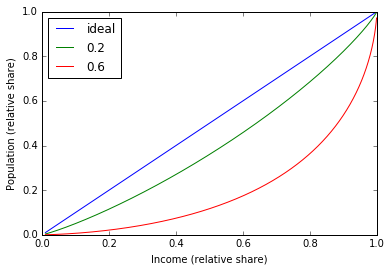

In [8]:
x = np.linspace(0.01, 0.999, 1000)
plt.plot(x, x, label='ideal')
for gini in [0.2, 0.6]:
    y = dist.lorenz(x, gini=gini)
    plt.plot(x, y, label=str(gini))
plt.xlabel('Income (relative share)'); plt.ylabel('Population (relative share)'); plt.legend(loc='best')

We can again see the effect of applying the empirical Theil relationship on the Lorenz curves.

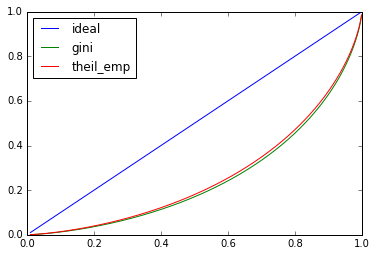

In [9]:
gini = 0.5
theil = ineq.gini_to_theil(gini, empirical=True)
plt.plot(x, x, label='ideal')
plt.plot(x, dist.lorenz(x, gini=gini), label='gini')
plt.plot(x, dist.lorenz(x, theil=theil, gini=None), label='theil_emp')
plt.legend(loc='best')

# Populations below Income Thresholds

A common application of inequality calculations is to determine the fractions of populations in various income quantiles. A convenience function is provided to make this straightforward.

In [10]:
dist = ineq.LogNormal(inc=1000, gini=0.4)
dist.below_threshold(500) # ~ 30% makes less than 500

0.28643175826024936

In [11]:
dist.below_threshold(1500) # ~ 80% makes less than 500

0.82057020130849057